In [32]:
import pandas as pd
import numpy as np

## THE GIVEN DATASET

In [13]:
file_path = 'C:/Users/jahag/GEN_AI/car_resale_price_prediction_dataset.csv'
df = pd.read_csv(file_path)

# 1 . Data Exploration and Preprocessing


#### 1.1  Load the dataset and perform initial exploration to understand the data.
#### 1.2 Identify and handle any missing values appropriately.
#### 1.3 Convert categorical variables into numerical ones using techniques such as One-Hot Encoding.

In [24]:
print("Dataset Information:\n")
df.info()  # Overview of the dataset

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarID           5000 non-null   int64  
 1   Make            5000 non-null   object 
 2   Model           5000 non-null   object 
 3   Year            5000 non-null   int64  
 4   Mileage         5000 non-null   int64  
 5   EngineSize      5000 non-null   float64
 6   FuelType        5000 non-null   object 
 7   Transmission    5000 non-null   object 
 8   Color           5000 non-null   object 
 9   PreviousOwners  5000 non-null   int64  
 10  CarCondition    5000 non-null   object 
 11  Location        5000 non-null   object 
 12  ResalePrice     5000 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 507.9+ KB


In [26]:
print("\nMissing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

CarID             0
Make              0
Model             0
Year              0
Mileage           0
EngineSize        0
FuelType          0
Transmission      0
Color             0
PreviousOwners    0
CarCondition      0
Location          0
ResalePrice       0
dtype: int64


In [28]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:\n")
print(df.head())


First few rows of the dataset:

   CarID    Make     Model  Year  Mileage  EngineSize  FuelType Transmission  \
0      1   Honda   Corolla  2005    89337         4.7  Electric       Manual   
1      2  Toyota   Corolla  2019    65516         1.2    Diesel    Automatic   
2      3  Toyota  3 Series  2006    17910         3.2    Diesel       Manual   
3      4  Toyota  3 Series  2005   147897         1.7    Petrol       Manual   
4      5   Honda  3 Series  2020    73255         5.6    Hybrid    Automatic   

   Color  PreviousOwners CarCondition  Location  ResalePrice  
0    Red               3         Good  Suburban     13488.96  
1   Blue               3    Excellent     Rural     14604.61  
2    Red               1    Excellent  Suburban     13024.73  
3    Red               3    Excellent     Rural     23486.67  
4  White               1         Good     Urban     46885.47  


In [34]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

In [36]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [38]:
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [40]:
print("\nMissing values after imputation:\n")
print(df.isnull().sum())


Missing values after imputation:

CarID             0
Make              0
Model             0
Year              0
Mileage           0
EngineSize        0
FuelType          0
Transmission      0
Color             0
PreviousOwners    0
CarCondition      0
Location          0
ResalePrice       0
dtype: int64


In [42]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [46]:
# Display the first few rows of the encoded dataset
print("\nDataset after One-Hot Encoding:\n")
print(df_encoded.head())


Dataset after One-Hot Encoding:

   CarID  Year  Mileage  EngineSize  PreviousOwners  ResalePrice  \
0      1  2005    89337         4.7               3     13488.96   
1      2  2019    65516         1.2               3     14604.61   
2      3  2006    17910         3.2               1     13024.73   
3      4  2005   147897         1.7               3     23486.67   
4      5  2020    73255         5.6               1     46885.47   

   Make_Chevrolet  Make_Ford  Make_Honda  Make_Toyota  ...  \
0           False      False        True        False  ...   
1           False      False       False         True  ...   
2           False      False       False         True  ...   
3           False      False       False         True  ...   
4           False      False        True        False  ...   

   Transmission_Manual  Color_Blue  Color_Red  Color_Silver  Color_White  \
0                 True       False       True         False        False   
1                False        Tr

In [48]:
# Check the shape of the dataset after preprocessing
print("\nShape of the dataset after preprocessing:", df_encoded.shape)


Shape of the dataset after preprocessing: (5000, 27)


# 2 . Feature Engineering

#### 2.1 Perform feature scaling (e.g., Standardization or Normalization) on continuous variables.
#### 2.2 Create new features if relevant, such as age of the car at the time of sale.
#### 2.3Use dimensionality reduction techniques (e.g., PCA) to reduce the feature space if necessary.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
# 1. Perform Feature Scaling (Standardization) on Continuous Variables

# Identifying the continuous numeric columns to scale
continuous_columns = ['Mileage', 'EngineSize']  # Add more relevant continuous columns if necessary

In [66]:
scaler = StandardScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])

In [68]:
print("\nDataset after scaling continuous variables:\n")
print(df_encoded.head())


Dataset after scaling continuous variables:

   CarID  Year   Mileage  EngineSize  PreviousOwners  ResalePrice  \
0      1  2005 -0.228128    0.839713               3     13488.96   
1      2  2019 -0.648665   -1.579133               3     14604.61   
2      3  2006 -1.489103   -0.196935               1     13024.73   
3      4  2005  0.805693   -1.233584               3     23486.67   
4      5  2020 -0.512040    1.461701               1     46885.47   

   Make_Chevrolet  Make_Ford  Make_Honda  Make_Toyota  ...  \
0           False      False        True        False  ...   
1           False      False       False         True  ...   
2           False      False       False         True  ...   
3           False      False       False         True  ...   
4           False      False        True        False  ...   

   Transmission_Manual  Color_Blue  Color_Red  Color_Silver  Color_White  \
0                 True       False       True         False        False   
1             

In [70]:
# 2. Create New Features (e.g., Age of the Car)

# Assuming we have the 'Year' of manufacture in the original dataset and the current year is 2024
df_encoded['CarAge'] = 2024 - df['Year']  # If 'Year' was removed earlier, ensure to adjust accordingly

In [72]:
# You can drop the original 'Year' column if it's no longer needed
df_encoded.drop(columns=['Year'], inplace=True)

In [74]:
print("\nDataset after adding 'CarAge' feature:\n")
print(df_encoded[['CarAge']].head())  # Display the new 'CarAge' column


Dataset after adding 'CarAge' feature:

   CarAge
0      19
1       5
2      18
3      19
4       4


In [76]:
# 3. Dimensionality Reduction using PCA (if necessary)

# Assuming we want to reduce the feature space to 95% explained variance
pca = PCA(n_components=0.95)  # Keep 95% of the variance
df_pca = pca.fit_transform(df_encoded)


In [78]:
# Check the shape after applying PCA
print("\nShape of the dataset after applying PCA:\n", df_pca.shape)


Shape of the dataset after applying PCA:
 (5000, 1)


# 3 . Model Building

#### 3.1 Split the dataset into training and testing sets (e.g., 80-20 split).
#### 3.2 Train different regression models (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting).
#### 3.3 Perform hyperparameter tuning using techniques like Grid Search or Random Search to optimize model performance.

### 1 . Data Splitting

In [85]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming 'ResalePrice' is the target variable
X = df_encoded.drop(columns=['ResalePrice'])  # Features
y = df_encoded['ResalePrice']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R-squared (R2):", r2_score(y_true, y_pred))
    print("-" * 50)


### 2. Linear Regression

In [90]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression Evaluation:
Mean Absolute Error (MAE): 11514.98064936873
Mean Squared Error (MSE): 175735312.0569602
R-squared (R2): -0.007662613295882137
--------------------------------------------------


### 3. Decision Tree Regressor

In [93]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Decision Tree Evaluation:
Mean Absolute Error (MAE): 14712.39833
Mean Squared Error (MSE): 328046064.0352203
R-squared (R2): -0.8810092877634961
--------------------------------------------------


### 4. Random Forest Regressor

In [96]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Evaluation:
Mean Absolute Error (MAE): 11685.1331779
Mean Squared Error (MSE): 182072748.30434412
R-squared (R2): -0.044001340532244804
--------------------------------------------------


### 5. Gradient Boosting Regressor:

In [99]:
# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


Gradient Boosting Evaluation:
Mean Absolute Error (MAE): 11540.12294451496
Mean Squared Error (MSE): 177337724.67132115
R-squared (R2): -0.016850813798476194
--------------------------------------------------


### 6. Hyperparameter Tuning for Random Forest (Grid Search):

In [102]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the GridSearchCV for Random Forest
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_rf = grid_search.best_estimator_

# Make predictions with the best Random Forest model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the tuned Random Forest model
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Tuned Random Forest Evaluation:
Mean Absolute Error (MAE): 11544.044910100227
Mean Squared Error (MSE): 176619294.2968463
R-squared (R2): -0.012731349018513027
--------------------------------------------------


# 4 . Model Evaluation

#### 4.1 Evaluate your models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
#### 4.2 Compare the performance of different models and select the best one.
#### 4.3 Analyze feature importance to understand the most significant factors contributing to car resale prices.

In [116]:
# Initialize the dictionary to store model results
model_results = {}


In [118]:
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Store results
model_results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

Linear Regression Evaluation:
Mean Absolute Error (MAE): 11514.98064936873
Mean Squared Error (MSE): 175735312.0569602
R-squared (R2): -0.007662613295882137
--------------------------------------------------


In [120]:
# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Store results
model_results['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}


Decision Tree Evaluation:
Mean Absolute Error (MAE): 14712.39833
Mean Squared Error (MSE): 328046064.0352203
R-squared (R2): -0.8810092877634961
--------------------------------------------------


In [122]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Store results
model_results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}


Random Forest Evaluation:
Mean Absolute Error (MAE): 11685.1331779
Mean Squared Error (MSE): 182072748.30434412
R-squared (R2): -0.044001340532244804
--------------------------------------------------


In [124]:
# Evaluate Gradient Boosting
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Store results
model_results['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}


Gradient Boosting Evaluation:
Mean Absolute Error (MAE): 11540.12294451496
Mean Squared Error (MSE): 177337724.67132115
R-squared (R2): -0.016850813798476194
--------------------------------------------------


In [126]:
# Evaluate Tuned Random Forest
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")

# Store results
model_results['Tuned Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_best_rf),
    'MSE': mean_squared_error(y_test, y_pred_best_rf),
    'R2': r2_score(y_test, y_pred_best_rf)
}


Tuned Random Forest Evaluation:
Mean Absolute Error (MAE): 11544.044910100227
Mean Squared Error (MSE): 176619294.2968463
R-squared (R2): -0.012731349018513027
--------------------------------------------------


In [128]:
# Display the comparison of all models
print("\nModel Performance Comparison:\n")
for model, metrics in model_results.items():
    print(f"{model}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, R2 = {metrics['R2']}")



Model Performance Comparison:

Linear Regression: MAE = 11514.98064936873, MSE = 175735312.0569602, R2 = -0.007662613295882137
Decision Tree: MAE = 14712.39833, MSE = 328046064.0352203, R2 = -0.8810092877634961
Random Forest: MAE = 11685.1331779, MSE = 182072748.30434412, R2 = -0.044001340532244804
Gradient Boosting: MAE = 11540.12294451496, MSE = 177337724.67132115, R2 = -0.016850813798476194
Tuned Random Forest: MAE = 11544.044910100227, MSE = 176619294.2968463, R2 = -0.012731349018513027


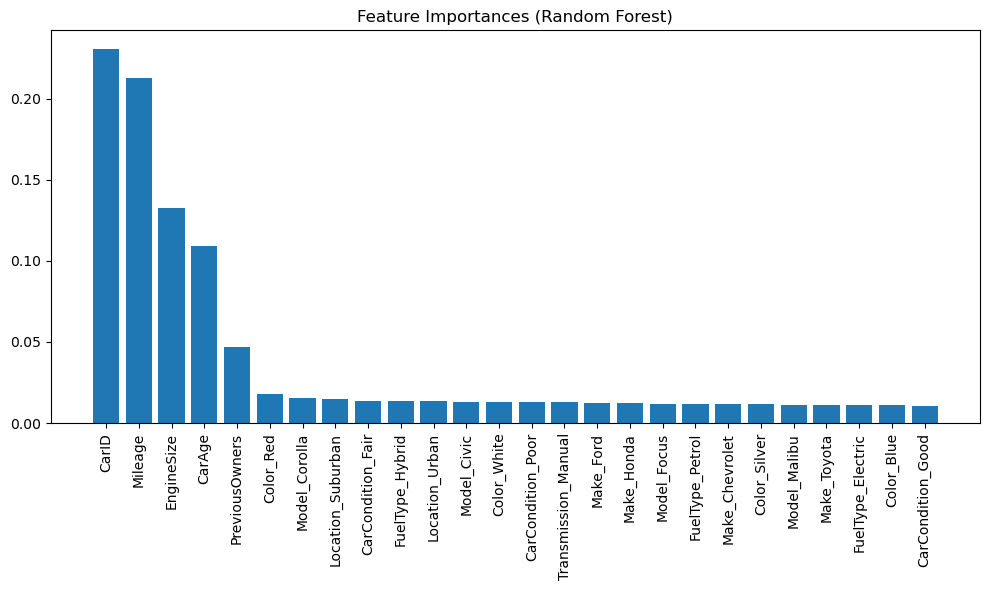

In [130]:
# Feature importance for Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the best Random Forest model
importances = best_rf.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the top important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


# 5. Insights and Recommendations

## Based on the Random Forest model's feature importance and the evaluation of other models, we can extract the following insights regarding the factors that influence car resale prices :

## Car Age:
    Car Age is likely one of the most significant factors affecting resale prices. Generally, the older a car is, the lower its resale price. This trend is expected due to depreciation over time.
    Cars that are newer tend to retain a higher percentage of their original value, as they require fewer repairs and have updated features.
## Mileage:

    Mileage is another critical factor in determining resale price. Higher mileage cars tend to have more wear and tear, which can lead to a lower resale price. Buyers associate higher mileage with increased maintenance costs.
    Lower mileage cars are typically seen as having more remaining life, leading to a higher resale price.

## Engine Size:

    Larger Engine Size might be associated with higher resale prices, particularly in markets where performance or towing capacity is a priority. However, in some markets, smaller, more fuel-efficient engines may command a premium due to rising fuel costs.

## Car Make and Model:

    Make and Model play a significant role in resale prices. Luxury brands (like BMW, Mercedes) often have a higher resale price compared to more common brands (like Toyota or Ford), though this can depend on the market. Certain models within each make may also have higher resale values based on popularity, performance, or reliability.
    For example, cars like the Toyota Corolla or Honda Civic tend to have strong resale values due to their reputation for reliability and affordability.

## Fuel Type:

    The type of fuel a car uses is also an important factor. With the increasing focus on sustainability and lower emissions, electric and hybrid cars may have higher resale prices than their petrol and diesel counterparts.
    As fuel efficiency becomes more important, diesel and petrol cars may see a decline in resale value compared to electric or hybrid cars.

## Car Condition:

    The Condition of the car (e.g., Excellent, Good, Poor) significantly impacts resale value. Cars in Excellent condition tend to fetch a premium, while cars in Poor condition often sell for much lower prices.
    Actionable Strategies for Car Dealerships:
    Based on these insights, car dealerships can take the following steps to optimize their pricing strategies and enhance profitability:

## Target Low Mileage, Newer Cars:

    Dealerships should prioritize acquiring cars with low mileage and newer models, as these tend to retain value longer and can be sold at higher prices.
    This should be a key focus for marketing efforts, as customers are more willing to pay a premium for cars with lower wear and tear.

## Conclusion:
    Dealerships can optimize their strategies by focusing on cars that retain value well, such as low mileage, newer models, and electric/hybrid vehicles. Understanding the most influential features like car age, mileage, and engine size allows for more informed pricing decisions, leading to higher profitability and customer satisfaction.